In [6]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [8]:
data = pd.read_csv("spotify.csv", encoding="latin1")


In [9]:
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [10]:
#null values
pd.isnull(data).sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [12]:
sorted_df = data.sort_values('track_popularity', ascending = True).head(10)
sorted_df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
11645,3mXBM0LLk0bemiuCHyvQ9S,El Laberinto - Live,Miguel Rios,0,5fstCqs5NpIlF42VhPNv23,Rock & Rios (Remastered),2005-01-01,Rock and Rios,2gpKfzXEi8QWvgBNPDPk5R,rock,...,11,-9.207,0,0.0590,0.0122,0.000000,0.4150,0.558,185.327,51853
18994,4EoDcHQ7lOj4RGgRibFLXh,Un SueÃ±o,R.K.M & Ken-Y,0,0VKEkSWbmAyBEVuvlhMmas,Reggaeton Hits Factory,2007-01-01,Reggaeton Classics,37i9dQZF1DX8SfyqmSFDwe,latin,...,1,-4.959,1,0.0622,0.1570,0.033200,0.3090,0.805,95.006,245427
19127,4YAcCjGlRfpcFLyxiI54K7,No Es Culpa MÃ­a,DY,0,6pa7ftXvhHJWLvuE4A5mLI,No Es Culpa MÃ­a,2017-05-24,Reggaeton De Ayer,37i9dQZF1DWWU6Rfto8Ppm,latin,...,10,-4.337,1,0.0986,0.4370,0.000001,0.0798,0.714,94.053,107572
19160,76tsb1MlePUaN0Y3R8w0KO,Web Cam,Farruko,0,31WdDt5NcgMhHA8Uh1RZFA,The Ones,2015-08-28,Reggaeton De Ayer,37i9dQZF1DWWU6Rfto8Ppm,latin,...,7,-7.085,1,0.0504,0.2100,0.000000,0.3830,0.542,80.989,206639
19168,54rF7OkHKlNJFuePn7sBsJ,Sexo Seguro,"Franco ""El Gorilla""",0,0GqH0aPhP29I1yE9O7pzNt,Welcome To The Jungle,2009-01-01,Reggaeton De Ayer,37i9dQZF1DWWU6Rfto8Ppm,latin,...,4,-6.230,0,0.0905,0.0853,0.000000,0.1080,0.585,97.015,218507
19178,6iFgpfqV152RVIXSNfQuhj,Flow Violento,Arcangel,0,6yPjXW0WhOnJbRGl2wLtA4,Flow Violento Vol.1,2019-04-11,Reggaeton De Ayer,37i9dQZF1DWWU6Rfto8Ppm,latin,...,9,-6.760,1,0.1840,0.2660,0.000000,0.2370,0.925,80.018,186619
19186,3DQLEEsPTaXTKay4QtDbfC,Nuestro Amor Es Asi,Magnate,0,6HHTfrMM5EZQv7hMPGVFwq,Progresivo,2007-01-01,Reggaeton De Ayer,37i9dQZF1DWWU6Rfto8Ppm,latin,...,10,-5.127,1,0.0599,0.5050,0.000000,0.2150,0.585,94.931,177680
11457,51pvjqS1XmaObmjovRnHiL,Natsu No Owari,T-SQUARE,0,0TvVsaFDsyqHwzrJ04mjhH,Paradise,2015-07-08,City Pop 1985 ã·ãã£ã¼ããã,3j2osvmecEao5nmo9jZ5df,rock,...,7,-8.163,1,0.0242,0.0515,0.562000,0.1040,0.713,100.045,308867
27749,6AdD7ReUe1mk5ixLfGnSwO,Stardust,Lucas & Steve,0,1crgxyEW2xWxeb7mCamyBO,Stardust,2017-09-22,Jeff Seid Electro House,2Tisn6NZbeofpc57Oc6MGo,edm,...,8,-2.337,0,0.1580,0.0254,0.000011,0.0604,0.509,126.075,175000
27747,2gfToY9trgUdYIgPkc8zwR,Thanks A Million,Jay Hardway,0,2zVNpQs05XWyQJVOksyzYX,Thanks A Million,2017-09-04,Jeff Seid Electro House,2Tisn6NZbeofpc57Oc6MGo,edm,...,9,-9.396,1,0.0316,0.0105,0.073300,0.1660,0.455,120.010,216407


In [13]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
track_popularity,32833.0,42.477081,24.984074,0.000000,24.0000,45.000000,62.00000,100.000
danceability,32833.0,0.654850,0.145085,0.000000,0.5630,0.672000,0.76100,0.983
energy,32833.0,0.698619,0.180910,0.000175,0.5810,0.721000,0.84000,1.000
key,32833.0,5.374471,3.611657,0.000000,2.0000,6.000000,9.00000,11.000
loudness,32833.0,-6.719499,2.988436,-46.448000,-8.1710,-6.166000,-4.64500,1.275
mode,32833.0,0.565711,0.495671,0.000000,0.0000,1.000000,1.00000,1.000
speechiness,32833.0,0.107068,0.101314,0.000000,0.0410,0.062500,0.13200,0.918
acousticness,32833.0,0.175334,0.219633,0.000000,0.0151,0.080400,0.25500,0.994
instrumentalness,32833.0,0.084747,0.224230,0.000000,0.0000,0.000016,0.00483,0.994
liveness,32833.0,0.190176,0.154317,0.000000,0.0927,0.127000,0.24800,0.996


In [14]:
most_popular = data.query('track_popularity>90', inplace = False).sort_values('track_popularity',ascending=False)
most_popular[:10]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
20091,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,latin,...,6,-6.400,0,0.0924,0.6920,0.000104,0.1490,0.513,98.027,209438
1551,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,"post-teen alternative, indie, pop (large variety)",1y42gwI5cuwjBslPyQNfqb,pop,...,6,-6.400,0,0.0924,0.6920,0.000104,0.1490,0.513,98.027,209438
21468,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Contemporary Urban,6wyJ4bsjZaUKa9f6GeZlAO,r&b,...,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636
23104,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Charts 2020 ð¥Top 2020ð¥Hits 2020ð¥Summe...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636
30202,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Charts 2020 ð¥Top 2020ð¥Hits 2020ð¥Summe...,3xMQTDLOIGvj3lWH5e5x6F,edm,...,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636
20092,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,latin,...,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636
18756,7k4t7uLgtOxPwTpFmtJNTY,Tusa,KAROL G,98,7mKevNHhVnZER3BLgI8O4F,Tusa,2019-11-07,Baila Reggaeton,37i9dQZF1DWY7IeIP1cdjF,latin,...,2,-3.280,1,0.2980,0.2950,0.000134,0.0574,0.574,101.085,200960
5508,0nbXyq5TXYPCO7pr3N8S4I,The Box,Roddy Ricch,98,52u4anZbHd6UInnmHRFzba,Please Excuse Me For Being Antisocial,2019-12-06,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,rap,...,10,-6.687,0,0.0559,0.1040,0.000000,0.7900,0.642,116.971,196653
23103,7k4t7uLgtOxPwTpFmtJNTY,Tusa,KAROL G,98,7mKevNHhVnZER3BLgI8O4F,Tusa,2019-11-07,Charts 2020 ð¥Top 2020ð¥Hits 2020ð¥Summe...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,2,-3.280,1,0.2980,0.2950,0.000134,0.0574,0.574,101.085,200960
18330,21jGcNKet2qwijlDFuPiPb,Circles,Post Malone,98,4g1ZRSobMefqF6nelkgibi,Hollywood's Bleeding,2019-09-06,2020 Hits & 2019 Hits â Top Global Tracks ð...,4JkkvMpVl4lSioqQjeAL0q,latin,...,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.553,120.042,215280


In [15]:
data[["track_artist"]].iloc[0:]

,track_artist
0,Ed Sheeran
1,Maroon 5
2,Zara Larsson
3,The Chainsmokers
4,Lewis Capaldi
...,...
32828,Lush & Simon
32829,Tegan and Sara
32830,Starkillers
32831,Mat Zo


In [16]:
data["duration"]=data["duration_ms"].apply(lambda x: round(x/1000))
data.drop("duration_ms", inplace = True, axis=1)

In [17]:
data.duration.head()

0    195
1    163
2    177
3    169
4    189
Name: duration, dtype: int64

In [18]:
data['track_popularity'].describe()

count    32833.000000
mean        42.477081
std         24.984074
min          0.000000
25%         24.000000
50%         45.000000
75%         62.000000
max        100.000000
Name: track_popularity, dtype: float64

In [19]:
sample_df=data.sample(int(0.004*len(data)))

In [20]:
print(len(sample_df))

131


[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

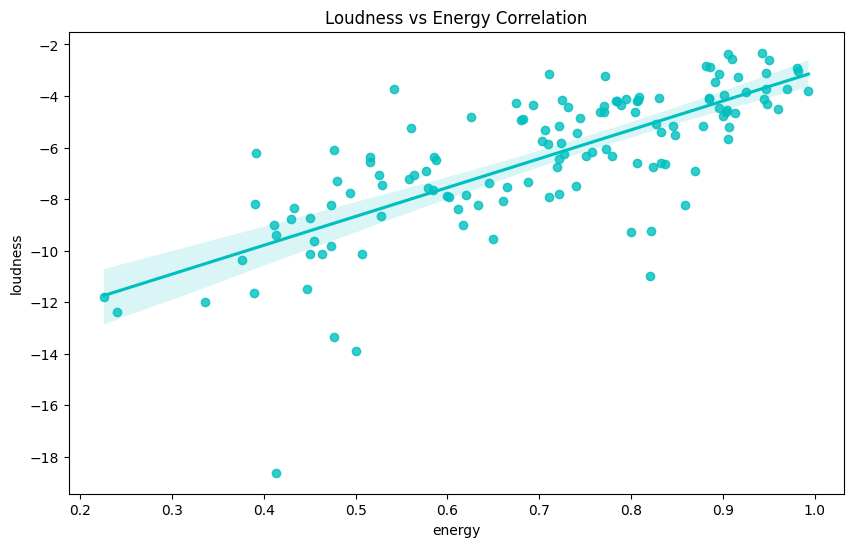

In [21]:
plt.figure(figsize=(10,6))
sns.regplot(data = sample_df,y = "loudness", x = "energy",color = "c").set(title="Loudness vs Energy Correlation")

[Text(0.5, 1.0, 'track_popularity vs acousticness Correlation')]

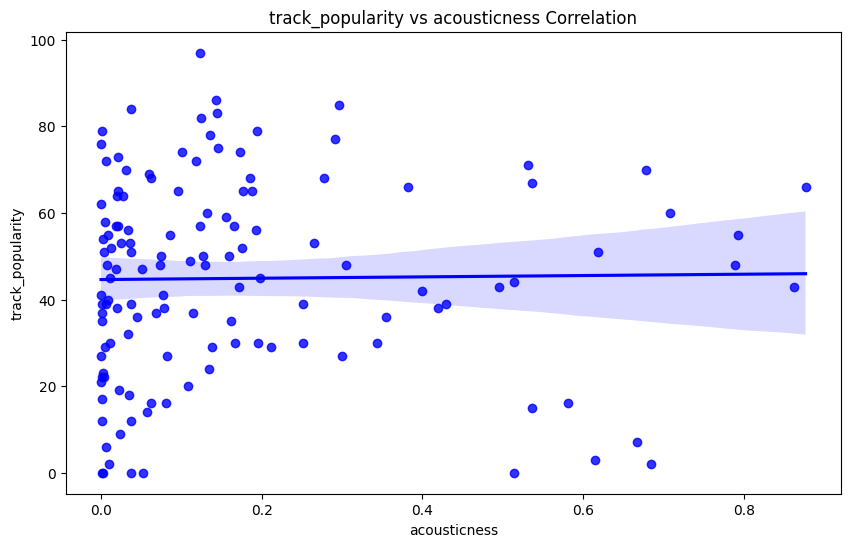

In [22]:
plt.figure(figsize=(10,6))
sns.regplot(data = sample_df,y = "track_popularity", x = "acousticness",color = "b").set(title="track_popularity vs acousticness Correlation")

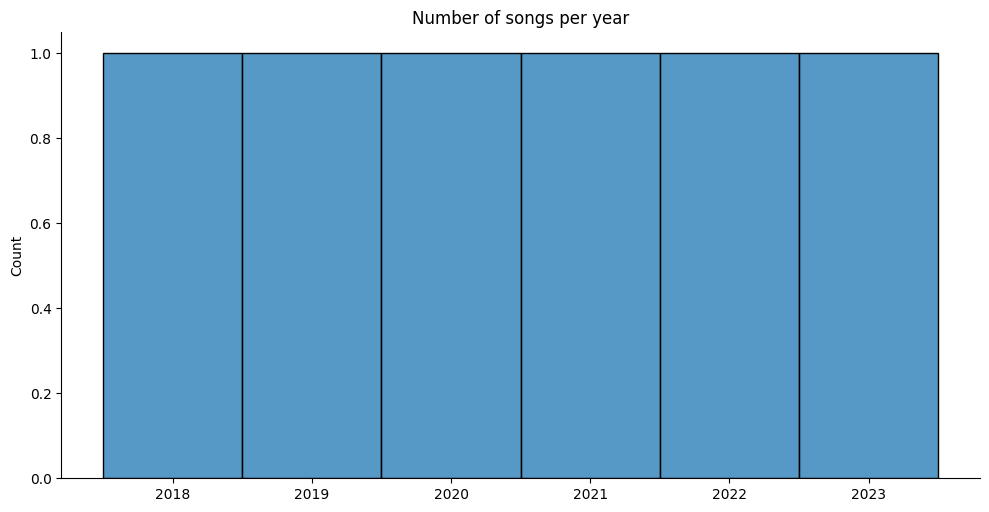

In [24]:
years = [2018, 2019, 2020, 2021, 2022, 2023]

sns.displot(years, discrete=True, aspect=2, height=5, kind="hist").set(title="Number of songs per year")

(array([2017., 2018., 2019., 2020., 2021., 2022., 2023., 2024.]),
 [Text(2017.0, 0, '2017'),
  Text(2018.0, 0, '2018'),
  Text(2019.0, 0, '2019'),
  Text(2020.0, 0, '2020'),
  Text(2021.0, 0, '2021'),
  Text(2022.0, 0, '2022'),
  Text(2023.0, 0, '2023'),
  Text(2024.0, 0, '2024')])

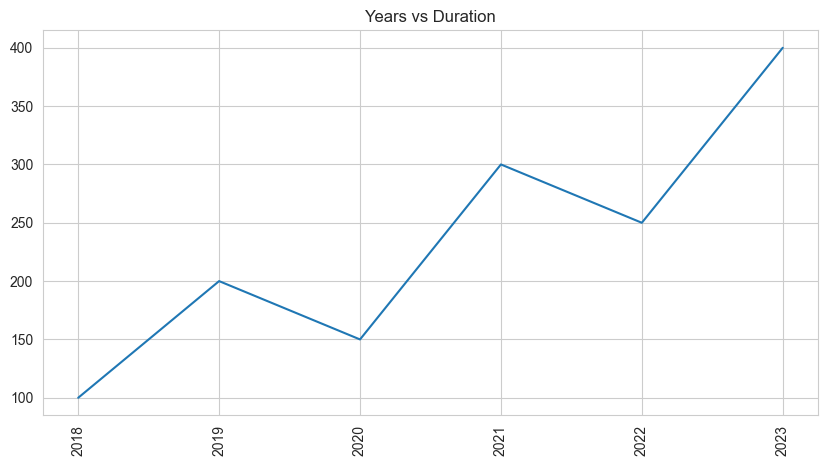

In [25]:
years = [2018, 2019, 2020, 2021, 2022, 2023]
total_dr = [100, 200, 150, 300, 250, 400]

sns.set_style(style="whitegrid")
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x=years[:6], y=total_dr[:6], ax=ax).set(title="Years vs Duration")
plt.xticks(rotation=90)

In [27]:
print(data.columns)

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration'],
      dtype='object')


Text(0, 0.5, 'playlist_genre')

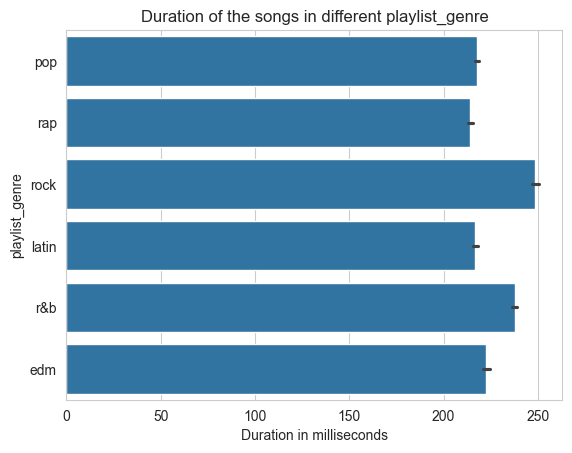

In [28]:
plt.title("Duration of the songs in different playlist_genre")
sns.color_palette("rocket", as_cmap=True)
sns.barplot(y="playlist_genre", x="duration", data=data)
plt.xlabel("Duration in milliseconds")
plt.ylabel("playlist_genre")

In [31]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [32]:
df = pd.read_csv('spotify.csv')

In [33]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [34]:
most_popular = df.query('track_popularity > 90').sort_values('track_popularity', ascending=False)[:10]

In [35]:
most_popular[:10]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
20091,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,latin,...,6,-6.400,0,0.0924,0.6920,0.000104,0.1490,0.513,98.027,209438
1551,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,"post-teen alternative, indie, pop (large variety)",1y42gwI5cuwjBslPyQNfqb,pop,...,6,-6.400,0,0.0924,0.6920,0.000104,0.1490,0.513,98.027,209438
21468,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Contemporary Urban,6wyJ4bsjZaUKa9f6GeZlAO,r&b,...,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636
23104,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636
30202,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,edm,...,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636
20092,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,latin,...,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636
18756,7k4t7uLgtOxPwTpFmtJNTY,Tusa,KAROL G,98,7mKevNHhVnZER3BLgI8O4F,Tusa,2019-11-07,Baila Reggaeton,37i9dQZF1DWY7IeIP1cdjF,latin,...,2,-3.280,1,0.2980,0.2950,0.000134,0.0574,0.574,101.085,200960
5508,0nbXyq5TXYPCO7pr3N8S4I,The Box,Roddy Ricch,98,52u4anZbHd6UInnmHRFzba,Please Excuse Me For Being Antisocial,2019-12-06,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,rap,...,10,-6.687,0,0.0559,0.1040,0.000000,0.7900,0.642,116.971,196653
23103,7k4t7uLgtOxPwTpFmtJNTY,Tusa,KAROL G,98,7mKevNHhVnZER3BLgI8O4F,Tusa,2019-11-07,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,2,-3.280,1,0.2980,0.2950,0.000134,0.0574,0.574,101.085,200960
18330,21jGcNKet2qwijlDFuPiPb,Circles,Post Malone,98,4g1ZRSobMefqF6nelkgibi,Hollywood's Bleeding,2019-09-06,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.553,120.042,215280


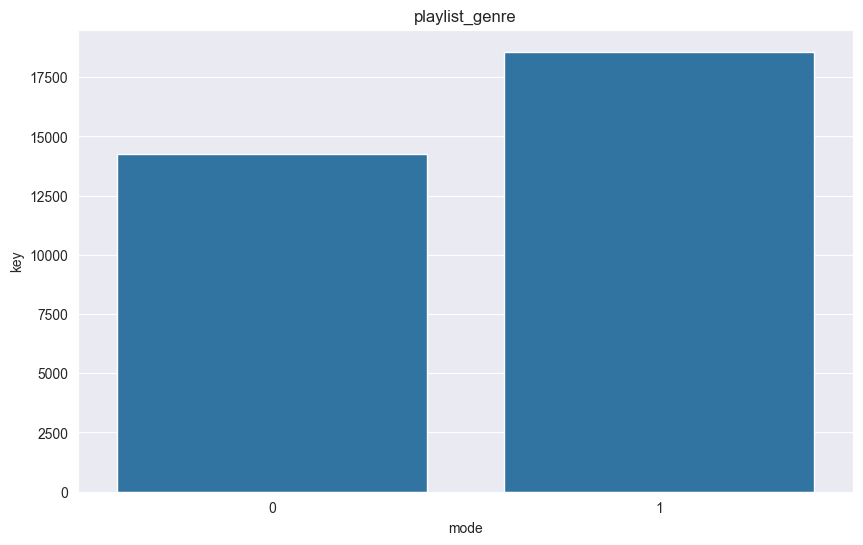

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='mode')
plt.title('playlist_genre')
plt.xlabel('mode')
plt.ylabel('key')
plt.show()

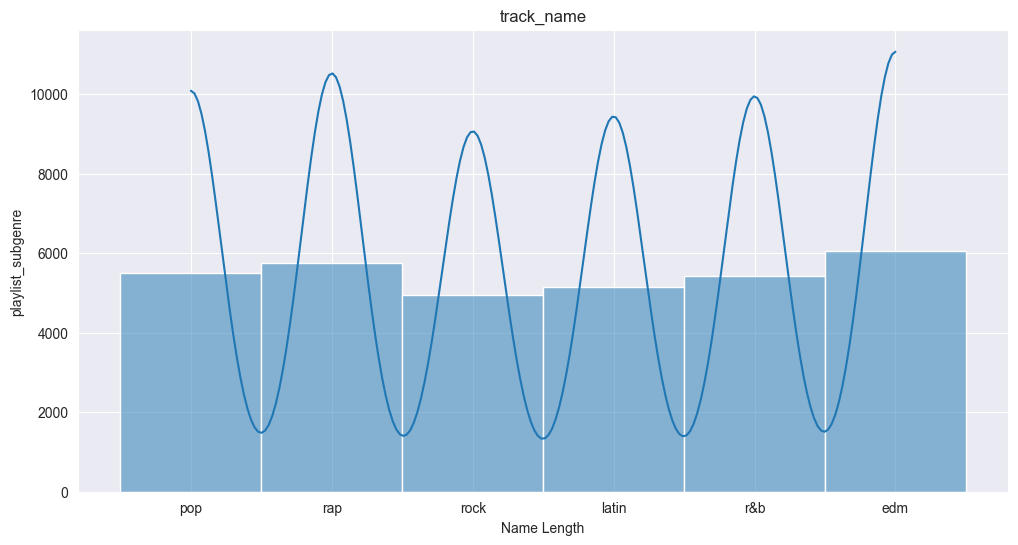

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='playlist_genre', bins=20, kde=True)
plt.title('track_name')
plt.xlabel('Name Length')
plt.ylabel('playlist_subgenre')
plt.show()

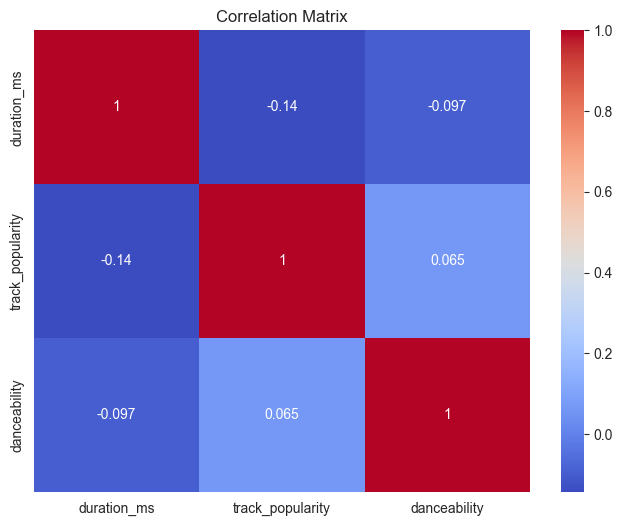

In [38]:
correlation_matrix = df[['duration_ms', 'track_popularity', 'danceability']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [39]:
features = ['energy', 'valence']
X = df.loc[:, features]

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_

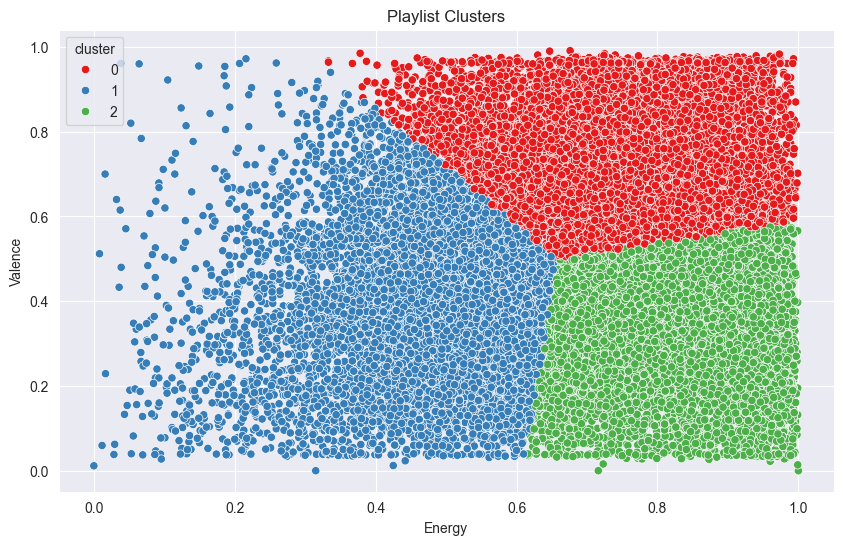

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='energy', y='valence', hue='cluster', palette='Set1')
plt.title('Playlist Clusters')
plt.xlabel('Energy')
plt.ylabel('Valence')
plt.show()

In [43]:
Y = df['valence']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state=0)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, df['mode'], test_size=0.2, random_state=42)